## Dataset 구성
---
Calc, Mass 클래스의 Dicom 파일로 구성되어있음

1. 총 Dicom 파일 개수 : 3103 <br>
2. Clac class Dicom 파일 개수 : 1511
    * Training : 1227
    * Test : 284<br>
3. Mass class Dicom 파일 개수 : 1592
    * Training : 1231
    * Test : 361

In [3]:
import glob
full_path = glob.glob(r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\*\*\*full*\1-1.dcm')
calc_path = glob.glob(r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Calc*\*\*full*\1-1.dcm')

calc_test_path = glob.glob(r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Calc-Test*\*\*full*\1-1.dcm')
calc_training_path = glob.glob(r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Calc-Training*\*\*full*\1-1.dcm')

mass_path = glob.glob(r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass*\*\*full*\1-1.dcm')

mass_test_path = glob.glob(r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass-Test*\*\*full*\1-1.dcm')
mass_training_path = glob.glob(r'D:\Gproject\DataSet\tcia_data\CBIS-DDSM\Mass-Training*\*\*full*\1-1.dcm')

In [4]:
# 3103
print('full len : ',len(full_path))
print("")

# 1511
print('calc len : ',len(calc_path))
# 1227
print('calc training len : ',len(calc_training_path))
# 284
print('calc test len : ',len(calc_test_path))
print("")

#1592
print('mass len : ',len(mass_path))
#1231
print('mass training len : ',len(mass_training_path))
#361
print('mass test len : ',len(mass_test_path))

full len :  3103

calc len :  1511
calc training len :  1227
calc test len :  284

mass len :  1592
mass training len :  1231
mass test len :  361


## Read Dicom file
---

* 파이썬 라이브러리의 Pydicom 사용, Dicom 파일내에 이미지 추출

In [ ]:
import tensorflow_io as tfio
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
# dicom path를 입력으로 받아서 img반환 (ndarray)
# normalzize 미포함(mask 이미지)
def dcm2img_uint8(dcm_path):
    image_bytes = tf.io.read_file(dcm_path)
    
    decode_img_lossy = tfio.image.decode_dicom_image(image_bytes,scale='auto',on_error='lossy', dtype=tf.uint8)
    #############################################################################################
    # args
    # scale : datatype 변형시 fill stretching 
    # on_error : dtype uint 16 -> 8할때 error 방지
    #############################################################################################
    decode_img_lossy_ndr = decode_img_lossy.numpy()
    decode_img_lossy_ndr = decode_img_lossy_ndr[0,...,0]
    return decode_img_lossy_ndr

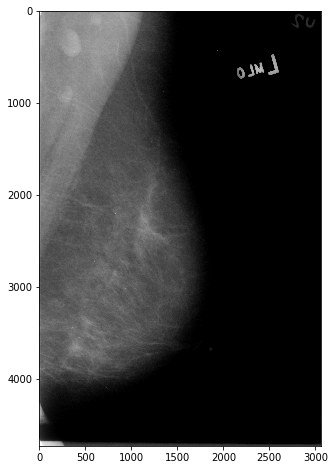

In [19]:
img = dcm2img_uint8(calc_path[1])
plt.figure(figsize=(8,8))
plt.xlim()
plt.ylim()
plt.imshow(img,cmap="gray")


In [18]:
import pydicom as pdi
dcm = pdi.read_file(calc_path[1])
dcm

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.265647748413262733922850405400999282492
(0008, 0020) Study Date                          DA: ''
(0008, 0023) Content Date                        DA: '20160503'
(0008, 0030) Study Time                          TM: ''
(0008, 0033) Content Time                        TM: '105950.914000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MG'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0010, 0010) Patient's Name                      PN: 'P_00038^P_00038'
(0010, 0020) Patient ID                          LO: 'P_00038_LEFT_MLO.dcm'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: '

## Cropping
---

In [37]:
import glob
train_path_crop = glob.glob(r"E:\DataSet\CBIS-DDSM\Crop_train\*full*.png")
train_path_calc_crop = glob.glob(r"E:\DataSet\CBIS-DDSM\Crop_train\Calc*full*.png")
train_path_mass_crop = glob.glob(r"E:\DataSet\CBIS-DDSM\Crop_train\Mass*full*.png")

val_path_crop = glob.glob(r"E:\DataSet\CBIS-DDSM\Crop_val\*full*")
val_path_calc_crop = glob.glob(r"E:\DataSet\CBIS-DDSM\Crop_val\Calc*full*")
val_path_mass_crop = glob.glob(r"E:\DataSet\CBIS-DDSM\Crop_val\Mass*full*")

test_path_crop = glob.glob(r"E:\DataSet\CBIS-DDSM\Crop_test\*full*")
test_path_calc_crop = glob.glob(r"E:\DataSet\CBIS-DDSM\Crop_test\Calc*full*")
test_path_mass_crop = glob.glob(r"E:\DataSet\CBIS-DDSM\Crop_test\Mass*full*")

In [39]:
print(len(train_path_crop),len(train_path_calc_crop),len(train_path_mass_crop))

2362 1221 1141


In [40]:
print(len(val_path_crop),len(val_path_calc_crop),len(val_path_mass_crop))

525 225 300


In [41]:
print(len(test_path_crop),len(test_path_calc_crop),len(test_path_mass_crop))

108 58 50


In [20]:
import glob
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
IMG_PATH = r'E:\DataSet\CBIS-DDSM\test_'

In [6]:
IMG_MASK_PATH = glob.glob(IMG_PATH + "\\*Mask*.png")

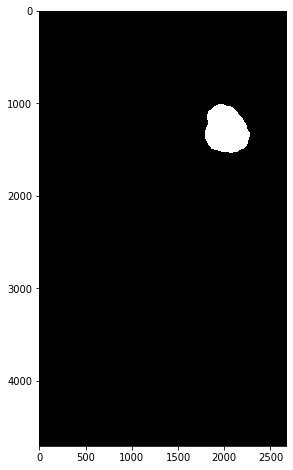

In [12]:
img = cv.imread(IMG_MASK_PATH[5],cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,8))
plt.imshow(img,cmap='gray')

In [19]:
hei, wid = img.shape

In [15]:
img_contours = cv.findContours(img,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)

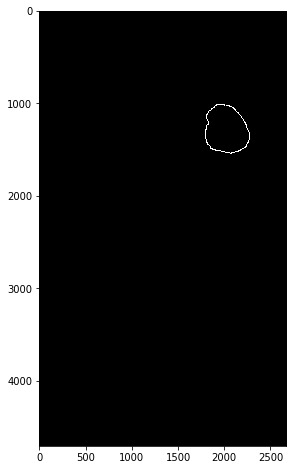

In [41]:
zeros = np.zeros((hei,wid))
for i in range(len(img_contours[1][0])):
    cv.circle(zeros,tuple(img_contours[1][0][i][0]),5,255)
plt.figure(figsize=(8,8))
plt.imshow(zeros,cmap='gray')

In [25]:
len(img_contours[1])

1

In [39]:
tuple(img_contours[1][0][1][0])

(1927, 1009)